## Get and prepare Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_data = pd.read_csv('airline-passengers.csv')
df_data.head(7)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148


In [3]:
df_data.shape

(144, 2)

In [4]:
df_passenger= df_data['Passengers']

In [5]:
# transform univariate time series to supervised learning problem
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
    # gather input and output parts of the pattern
        # print(i, end_ix)
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

## tuning data

In [6]:
n_steps = 5
X, y = split_sequence(df_passenger, n_steps)

In [7]:
print(X.shape, y.shape)

(139, 5) (139,)


In [8]:
n_steps = 5
X, y = split_sequence(df_passenger, n_steps)  # column names to X and y data frames
df_X = pd.DataFrame(X, columns=['t-' + str(i) for i in range(n_steps-1, -1, -1)])
df_y = pd.DataFrame(y, columns=['t+1 (prediction)'])

# concat df_X and df_y
df = pd.concat([df_X, df_y], axis=1)


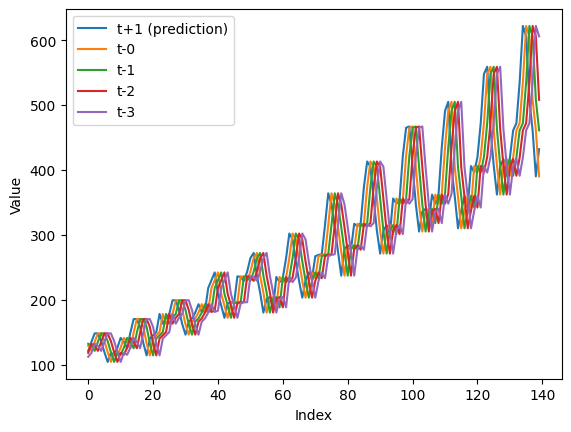

In [183]:
import matplotlib.pyplot as plt

# Plotting
plt.plot(df.index, df['t+1 (prediction)'], label='t+1 (prediction)')
for i in range(n_steps):
    plt.plot(df.index, df['t-' + str(i)], label='t-' + str(i))
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


In [9]:
# df_X.head()
# df_y.head()
df.head(5)

,t-4,t-3,t-2,t-1,t-0,t+1 (prediction)
0,112,118,132,129,121,135
1,118,132,129,121,135,148
2,132,129,121,135,148,148
3,129,121,135,148,148,136
4,121,135,148,148,136,119


## prepo

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_norm= scaler.fit_transform(df_X)
# y_norm= scaler.fit_transform(df_y)

In [11]:
X_norm

array([[0.01544402, 0.02702703, 0.05405405, 0.04826255, 0.03281853],
       [0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556],
       [0.05405405, 0.04826255, 0.03281853, 0.05984556, 0.08494208],
       [0.04826255, 0.03281853, 0.05984556, 0.08494208, 0.08494208],
       [0.03281853, 0.05984556, 0.08494208, 0.08494208, 0.06177606],
       [0.05984556, 0.08494208, 0.08494208, 0.06177606, 0.02895753],
       [0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ],
       [0.08494208, 0.06177606, 0.02895753, 0.        , 0.02702703],
       [0.06177606, 0.02895753, 0.        , 0.02702703, 0.02123552],
       [0.02895753, 0.        , 0.02702703, 0.02123552, 0.04247104],
       [0.        , 0.02702703, 0.02123552, 0.04247104, 0.07142857],
       [0.02702703, 0.02123552, 0.04247104, 0.07142857, 0.05984556],
       [0.02123552, 0.04247104, 0.07142857, 0.05984556, 0.04054054],
       [0.04247104, 0.07142857, 0.05984556, 0.04054054, 0.08687259],
       [0.07142857, 0.05984556, 0.

## Split data

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=0)

## model

In [13]:
# import knn
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=7)

## fit and predict knn

In [14]:
model_knn.fit(X_train, y_train)
y_pred=model_knn.predict(X_test)

## mse

$$ \text{MSE} = \frac{1}{n} \sum_{i=0}^n (y_i - \hat{y}_i)^2$$ 

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1719.33527696793

## result

In [16]:
y_test.shape

(28,)

In [17]:
y_pred.shape

(28,)

In [18]:
df_y_test = pd.DataFrame(y_test,columns=['y_test'])
df_y_pred = pd.DataFrame(y_pred,columns=['y_pred'])

df_hasil = pd.concat([df_y_test, df_y_pred], axis=1)

In [19]:
df_hasil

,y_test,y_pred
0,126,133.142857
1,306,315.857143
2,472,406.714286
3,491,421.571429
4,184,201.285714
5,305,378.571429
6,264,238.857143
7,422,372.571429
8,310,372.428571
9,548,441.428571


In [20]:
# df_hasil.to_excel('df_hasil n_step={}.xlsx'.format(n_steps), index=False)

In [21]:
y.min()

104

In [22]:
y.max()

622

## MAPE

In [23]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred)

0.09142868695336426